In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)

flowers_images_dict = {    
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [4]:
flowers_labels_dict = {
    'daisy': 0,
    'dandelion': 1,
    'roses': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [5]:
img = cv2.imread(str(flowers_images_dict['daisy'][0]))

datasets\flower_photos\daisy\100080576_f52e8ee070_n.jpg


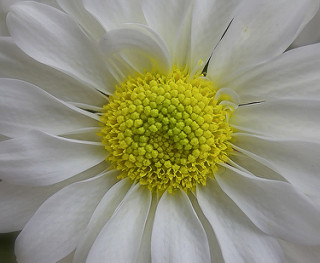

In [6]:
daisy = list(data_dir.glob('daisy/*'))
print(daisy[0])
PIL.Image.open(str(daisy[0]))

Resize the images

In [7]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [8]:
X = np.array(X)
y = np.array(y)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scale the images

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

CNN model

In [11]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [12]:
history = model.fit(
  X_train_scaled, y_train,
  validation_data=(X_test_scaled, y_test),
  epochs=10
)

Epoch 1/10
86/86 [==============================] - 88s 895ms/step - loss: 1.3728 - accuracy: 0.4081 - val_loss: 1.1889 - val_accuracy: 0.5153
Epoch 2/10
86/86 [==============================] - 70s 816ms/step - loss: 1.0168 - accuracy: 0.6108 - val_loss: 0.9846 - val_accuracy: 0.6046
Epoch 3/10
86/86 [==============================] - 75s 874ms/step - loss: 0.8129 - accuracy: 0.6911 - val_loss: 0.9122 - val_accuracy: 0.6547
Epoch 4/10
86/86 [==============================] - 71s 829ms/step - loss: 0.5974 - accuracy: 0.7762 - val_loss: 1.0075 - val_accuracy: 0.6362
Epoch 5/10
86/86 [==============================] - 70s 822ms/step - loss: 0.3652 - accuracy: 0.8754 - val_loss: 1.1667 - val_accuracy: 0.6231
Epoch 6/10
86/86 [==============================] - 70s 814ms/step - loss: 0.2074 - accuracy: 0.9364 - val_loss: 1.3378 - val_accuracy: 0.6057
Epoch 7/10
86/86 [==============================] - 74s 862ms/step - loss: 0.1240 - accuracy: 0.9648 - val_loss: 1.4343 - val_accuracy: 0.6514

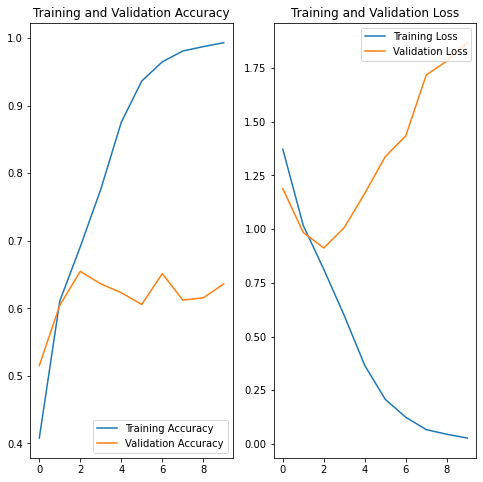

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Above plots are overfitting problems

In [15]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)


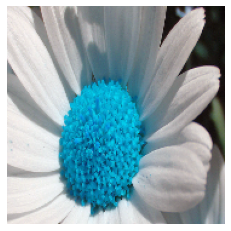

In [16]:
plt.axis('off')
plt.imshow(X[1])

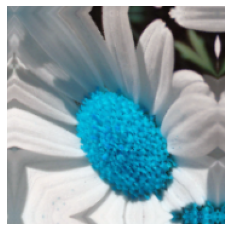

In [17]:
plt.axis('off')
plt.imshow(data_augmentation(X)[1].numpy().astype("uint8"))


## Implement data augmentation and dropout
to overcome the overfitting problem

In [21]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [22]:
history = model.fit(
  X_train_scaled, y_train,
  validation_data=(X_test_scaled, y_test),
  epochs=10
)

Epoch 1/10
86/86 [==============================] - 67s 724ms/step - loss: 1.4099 - accuracy: 0.4088 - val_loss: 1.0928 - val_accuracy: 0.5381
Epoch 2/10
86/86 [==============================] - 73s 851ms/step - loss: 1.0942 - accuracy: 0.5531 - val_loss: 1.0068 - val_accuracy: 0.5806
Epoch 3/10
86/86 [==============================] - 82s 962ms/step - loss: 1.0057 - accuracy: 0.6028 - val_loss: 0.9658 - val_accuracy: 0.6231
Epoch 4/10
86/86 [==============================] - 92s 1s/step - loss: 0.9320 - accuracy: 0.6334 - val_loss: 0.9098 - val_accuracy: 0.6373
Epoch 5/10
86/86 [==============================] - 83s 969ms/step - loss: 0.8653 - accuracy: 0.6512 - val_loss: 0.8978 - val_accuracy: 0.6394
Epoch 6/10
86/86 [==============================] - 88s 1s/step - loss: 0.8501 - accuracy: 0.6737 - val_loss: 0.8395 - val_accuracy: 0.6590
Epoch 7/10
86/86 [==============================] - 85s 997ms/step - loss: 0.8000 - accuracy: 0.7002 - val_loss: 0.8439 - val_accuracy: 0.6699
Epoch

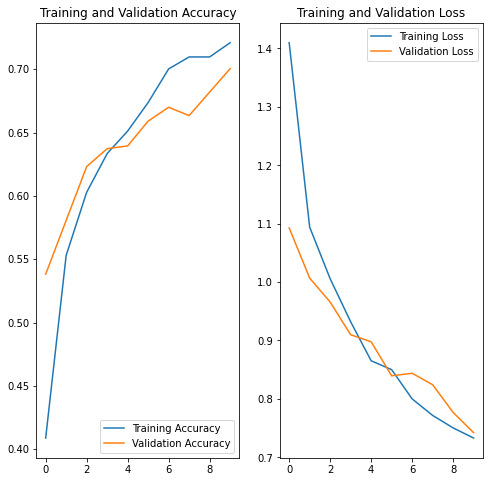

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
tf.keras.models.save_model(model,'flower_model.hdf5')

## Deploy the CNN model with streamlit

In [25]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

st.set_option('deprecation.showfileUploaderEncoding', False)

@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('./flower_model.hdf5')
    return model


def predict_class(image, model):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [180, 180])
    image = np.expand_dims(image, axis = 0)
    prediction = model.predict(image)
    return prediction

model = load_model()
st.title('Flower Classifier')

file = st.file_uploader("Upload an image of a flower", type=["jpg", "png"])

if file is None:
    st.text('Waiting for upload....')

else:
    slot = st.empty()
    slot.text('Running inference....')

    test_image = Image.open(file)
    st.image(test_image, caption="Input Image", width = 400)

    pred = predict_class(np.asarray(test_image), model)
    class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    result = class_names[np.argmax(pred)]
    
    output = 'The image is a ' + result
    slot.text('Done')
    st.success(output)

Overwriting app.py
